In [83]:
import sys
for k in ['ham_basic', 'Sequencer', 'sequencer']:
    if k in sys.modules: del sys.modules[k]
import pandas as pd
import numpy as np
import time

from ham_basic import program
program.initialize(B=200, R=0.5, delta=1)
program.read_data(pd.read_csv('close.csv'))

In [84]:
from sequencer import Sequencer
from scipy.optimize import minimize

seq = Sequencer()
seq.set_name('EfficientSU2, scipy-min on statevector')
seq.set_program(program)
seq.set_backend('statevector')
seq.set_ansatz('qiskit-EfficientSU2')

x0 = 2 * np.pi * np.random.random(program.size*8)
start_time = time.time()
cobyla = minimize(seq.cost_func, x0, method='COBYLA', options={'disp': True}) #'maxiter':400
end_time = time.time()

print("time for operation", end_time-start_time)
opt_params = cobyla.x
opt_energy = cobyla.fun

/home/bigabada/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:719: OptimizeWarning: Unknown solver options: iprint
  res = _minimize_cobyla(fun, x0, args, constraints, callback=callback,


time for operation 7.299952507019043

   Normal return from subroutine COBYLA

   NFVALS =  821   F = 1.264874E+00    MAXCV = 0.000000E+00
   X = 3.141944E+00   4.754087E+00   3.949446E+00   1.567591E+00   5.474128E+00
       1.648723E+00   1.601473E+00   4.433177E+00   8.196098E-01   6.283175E+00
       5.193171E+00   2.592344E-01   1.600870E+00   4.713706E+00   9.482555E-01
       5.945367E+00   4.900273E+00   4.030515E+00   1.903230E-01  -5.982642E-03
       1.974749E+00   2.687013E+00   1.589721E+00   2.960988E+00


optimal vector: [0. 0. 0. 1.]
money invested: 181.27999877929688


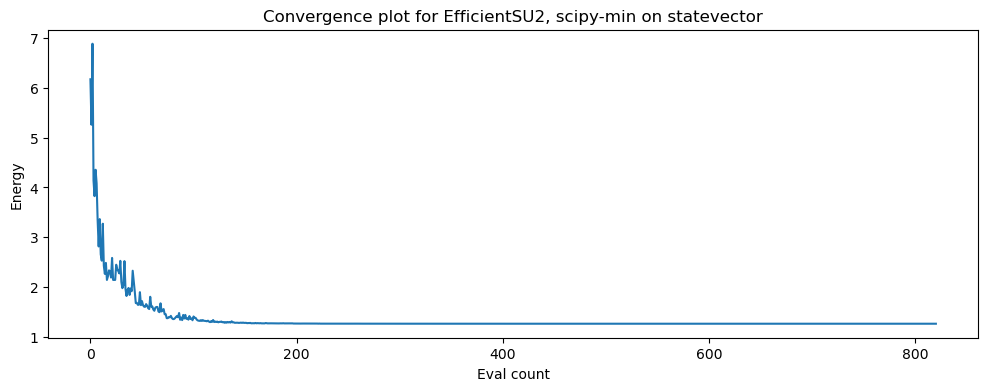

10.00   43.00   71.00   103.00  130.00  163.00  197.00  230.00  294.00  348.00  385.00  438.00  482.00  541.00  605.00  650.00  692.00  739.00  771.00  780.00  798.00  807.00  808.00  813.00  
-0.15   0.85    1.85    2.85    3.85    4.85    5.85    6.85    7.85    8.85    9.85    10.85   11.85   12.85   13.85   14.85   15.85   16.85   17.85   18.85   19.85   20.85   21.85   22.85   
-0.08   1.04    1.95    2.93    3.86    4.92    5.94    6.92    7.88    8.86    9.87    10.91   11.87   12.87   13.88   14.88   15.85   16.93   17.87   18.90   20.00   22.02   23.56   23.45   


In [85]:
ans_r = seq.ansatz_eval(opt_params)
program.interpret_qiskit_result(ans_r)

seq.vis.visualize()